# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2020-03-24 22:02:42--  https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2020-03-24 22:02:42 (3.85 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=117)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,831,100,47,70,185,70,7,162,40,20,153,179,406,172,68,9,6,200,205
1,757,91,43,72,142,56,7,149,45,19,140,168,327,165,72,13,23,186,191
2,490,108,54,109,189,57,11,220,31,25,174,229,709,214,70,12,23,189,201
3,60,103,50,98,212,63,9,193,34,22,161,214,567,185,64,5,5,198,204
4,134,102,54,100,163,53,10,213,31,24,173,219,669,201,76,12,27,187,195
5,338,97,45,91,161,63,10,151,45,19,148,166,334,171,65,18,20,197,205
6,58,107,53,103,221,66,11,209,32,24,163,222,653,212,66,0,1,191,201
7,192,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194
8,359,100,49,96,206,63,9,186,35,22,156,202,519,176,62,3,5,197,205
9,449,91,39,82,164,68,10,143,46,19,137,164,308,158,68,13,9,191,201


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.584699,93.892532,45.154827,82.610200,170.005464,61.839709,8.584699,169.644809,40.757741,20.650273,148.562842,189.386157,444.510018,176.169399,72.340619,6.466302,12.446266,189.083789,195.830601
std,249.508419,8.315259,6.214805,16.137332,33.149930,7.741948,4.683273,33.603901,7.939642,2.619708,14.567555,31.745743,177.252476,32.452415,7.586401,5.035028,9.055351,6.040337,7.341171
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,210.000000,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,320.000000,151.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,408.000000,93.000000,45.000000,81.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,146.000000,180.000000,365.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,642.000000,100.000000,51.000000,98.000000,196.000000,66.000000,10.000000,202.000000,46.000000,23.000000,161.000000,219.000000,608.000000,201.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,261.000000,61.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,203.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [0]:
import matplotlib.pyplot as plt

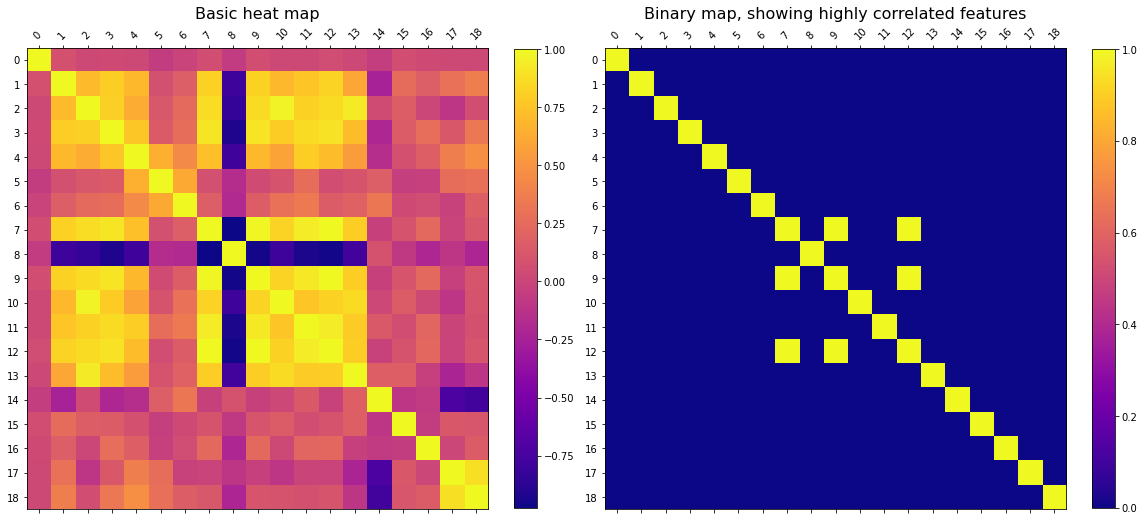

In [8]:
figure, axes = plt.subplots(ncols=2, figsize=(16, 8))
axis_1, axis_2 = axes
corr_matrix_1 = X_train_pd.corr()
corr_matrix_2 = np.abs(X_train_pd.corr()) > .99
columns_1 = corr_matrix_1.columns
columns_2 = corr_matrix_2.columns

# Heat maps.
heat_map_1 = axis_1.matshow(corr_matrix_1, cmap='plasma')
heat_map_2 = axis_2.matshow(corr_matrix_2, cmap='plasma')

# Formatting for heat map 1
axis_1.set_xticks(range(len(columns_1)))
axis_1.set_yticks(range(len(columns_1)))
axis_1.set_xticklabels(columns_1)
axis_1.set_yticklabels(columns_1)
axis_1.set_title("Basic heat map", {'fontsize': 16}, y=1)
plt.setp(axis_1.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
plt.colorbar(heat_map_1, fraction=0.045, pad=0.05, ax=axis_1)

# Formatting for heat map 2
axis_2.set_xticks(range(len(columns_2)))
axis_2.set_yticks(range(len(columns_2)))
axis_2.set_xticklabels(columns_2)
axis_2.set_yticklabels(columns_2)
axis_2.set_title("Binary map, showing highly correlated features", {'fontsize': 16}, y=1)
plt.setp(axis_2.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
plt.colorbar(heat_map_2, fraction=0.045, pad=0.05, ax=axis_2)

figure.tight_layout()

We can see that features 7, 9, 12 are highly correlated, hence we can use only one of those three to get better results.



In [9]:
X_train_modified = np.delete(X_train, [9, 12], axis=1)
X_test_modified = np.delete(X_test, [9, 12], axis=1)
X_train_modified.shape, X_test_modified.shape

((549, 17), (297, 17))

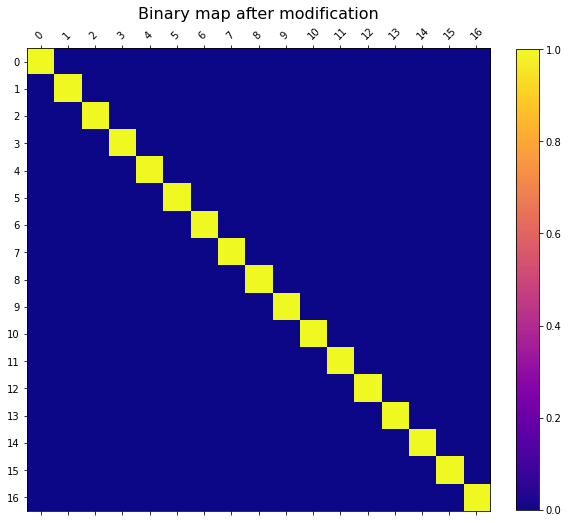

In [10]:
X_train_modified_pd = pd.DataFrame(X_train_modified)

figure, axes = plt.subplots(ncols=1, figsize=(8, 8))
axis_1 = axes
corr_matrix_1 = np.abs(X_train_modified_pd.corr()) > .99
columns_1 = corr_matrix_1.columns

# Heat maps
heat_map_1 = axis_1.matshow(corr_matrix_1, cmap='plasma')

# Formatting for heat map
axis_1.set_xticks(range(len(columns_1)))
axis_1.set_yticks(range(len(columns_1)))
axis_1.set_xticklabels(columns_1)
axis_1.set_yticklabels(columns_1)
axis_1.set_title("Binary map after modification", {'fontsize': 16}, y=1)
plt.setp(axis_1.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
plt.colorbar(heat_map_1, fraction=0.045, pad=0.05, ax=axis_1)

figure.tight_layout()

Here we can see, that everything went just fine, so now we have 17 features, that are less correlated with each other.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [12]:
pipe = Pipeline(
    [
      ("Scaler", StandardScaler()), 
      ("Logistic", LogisticRegression(
          multi_class='multinomial', 
          solver='saga', 
          tol=1e-3, 
          max_iter=500, 
          random_state=117))
    ]
)

parameters = {
    "Logistic__penalty": ["l1", "l2"], 
    "Logistic__C": np.linspace(0.1, 20.1, num=51, endpoint=True)
}

clf = GridSearchCV(
    pipe, 
    parameters, 
    scoring=["f1_weighted", "accuracy"], 
    n_jobs=-1, 
    cv=5, 
    refit="f1_weighted", #to have clf.best_params_
    verbose=1
)

clf.fit(X_train_modified, y_train)

print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

Fitting 5 folds for each of 102 candidates, totalling 510 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   57.4s


Best parameters:  {'Logistic__C': 0.9, 'Logistic__penalty': 'l1'}
Best score:  0.7926573885927242


[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:  1.1min finished


So for basic Logistic Regression we have best hyperparameters:
$$
C = 0.9, \ \ \operatorname{penalty} = \operatorname{l_1}
$$

In [13]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

In [0]:
import scikitplot

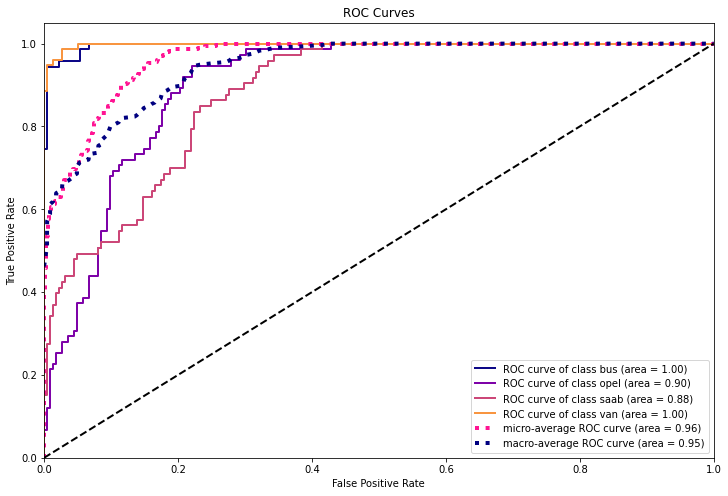

In [15]:
scikitplot.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test_modified), figsize=(12, 8), cmap='plasma')

We trained a Logistic estimator, everything looks just fine with it, scince micro-average ROC-curve area is $0.96$, and macro-average ROC-curve area is $0.95.$

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot. 

In [0]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=X_train_modified.shape[1])
scaler = StandardScaler()
mod_data = scaler.fit_transform(X_train_modified)
pca.fit(mod_data)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
import plotly.graph_objects as go

In [19]:
x = np.arange(X_train_modified.shape[1])
y = pca.explained_variance_ratio_

fig = go.Figure(data=[go.Bar(
            x=x, 
            y=y,
            text=y,
            name='For each',
            marker_color='rgb(55, 83, 109)',
        )])

fig.add_trace(go.Bar(
            x=x,
            y=y.cumsum(),
            name='Cumulative sum'
        ))

fig.update_layout(
    width=1000,
    height=700,
    title="The explained variance plot",
    xaxis=dict(
        title="Component after SVD",
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title="Component/cumulative explained varience",
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.1,
    bargroupgap=0
)
fig.show()

In [20]:
print("To have eplained varience more then 0.99 we'll have to keep first", ((pca.explained_variance_ratio_).cumsum() < 0.99).sum(), "components.")

To have eplained varience more then 0.99 we'll have to keep first 10 components.


We applied PCA to the train part of the data (minding the usage of StandardScale, as in pipeline). Throug the explained varience plot, we can leave only first 6 components, scince they give more than $0.05$ explained varience.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [0]:
pipe = Pipeline(
    [
     ("Scaler", StandardScaler()), 
     ("PCA", PCA(n_components=11)),
     ("Logistic", LogisticRegression(
         multi_class='multinomial', 
         solver='saga', 
         tol=1e-3,
         max_iter=500,
         random_state=117))
    ]
)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [108]:
parameters = {
    "Logistic__penalty": ["l1", "l2"], 
    "Logistic__C": np.linspace(0.1, 20.1, num=51, endpoint=True)
}

clf = GridSearchCV(
    pipe, 
    parameters, 
    scoring=["f1_weighted", "accuracy"], 
    n_jobs=-1, 
    cv=5, 
    refit="f1_weighted",
    verbose=1
)

clf.fit(X_train_modified, y_train)

print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

Fitting 5 folds for each of 102 candidates, totalling 510 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:   23.9s


Best parameters:  {'Logistic__C': 0.9, 'Logistic__penalty': 'l2'}
Best score:  0.7120670913201714


[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:   33.2s finished


So now we got best hyperparameters with PCA: 
$$
C = 1.3, \ \ \operatorname{penalty} = \operatorname{l_2}
$$

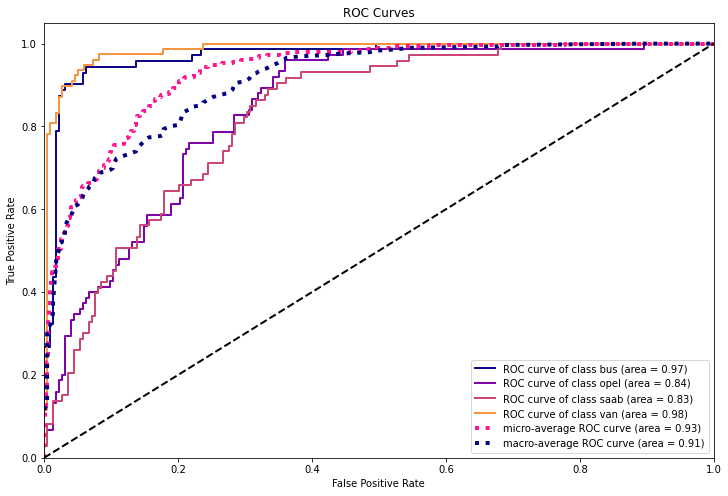

In [23]:
scikitplot.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test_modified), figsize=(12, 8), cmap='plasma')

We see, that everything worked just fine here, since we could get rid of 7 more components (features) and still have quite a qood accuracy level, scince micro-average ROC-curve area is $0.93$, and macro-average ROC-curve area is $0.91.$

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
pipe = Pipeline(
     [
      ("Scaler", StandardScaler()), 
      ("Tree", DecisionTreeClassifier(random_state=13)) #13 is quite experimental
     ]
)

parameters = {"Tree__max_depth": np.arange(1, 50)}

clf = GridSearchCV(
    pipe, 
    parameters, 
    scoring=["f1_weighted", "accuracy"], 
    n_jobs=-1, 
    cv=5, 
    refit="f1_weighted",
    verbose=1
)

clf.fit(X_train_modified, y_train)

print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best parameters:  {'Tree__max_depth': 7}
Best score:  0.7042061374262591


[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    1.5s finished


So now we got best hyperparameter for Desicion Tree Classifier: 
$$
\operatorname{max\_depth} = 7
$$

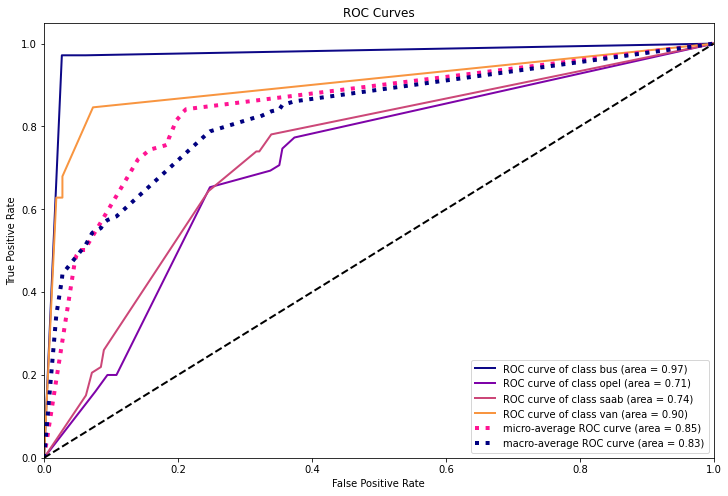

In [26]:
scikitplot.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test_modified), figsize=(12, 8), cmap='plasma')

We trained a Desicion tree estimator, everything looks just fine with it, scince micro-average ROC-curve area is $0.85$, and macro-average ROC-curve area is $0.83.$ (Would have wanted more, but as is).

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of N algorithms varying N from 2 to 100 (with step 2).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


To build a __Bagging__ ensebmle you might generate 50 subsets of `train` data (of the same size as the original dataset) using bootstrap procedure. Then you train logistic regression/decision tree with optimal hyperparameters you estimated before on each subset. Finally, you average the models predictions.

*Hint: sklearn might help you with this task. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as accuracy

In [0]:
estimators = {
    "Log_reg": LogisticRegression(
                    multi_class='multinomial', 
                    solver='saga', 
                    tol=1e-3, 
                    max_iter=1000, 
                    random_state=117,
                    C=0.9,
                    penalty="l1"
                ),
    "Tree": DecisionTreeClassifier(
                          random_state=13,
                          max_depth = 7
                      )
}

classifiers = {
    "Log_reg": None,
    "Tree": None
}

metrics_bagging = {
    "Log_reg__acc": [],
    "Log_reg__f1": [],
    "Tree__acc": [],
    "Tree__f1": []
}

for i in range(2, 100, 5):
    for estimator in estimators:
        classifiers[estimator] = BaggingClassifier(
            base_estimator=estimators[estimator],
            n_estimators=i,
            n_jobs=-1,
            random_state=420
        )
        classifiers[estimator].fit(X_train_modified, y_train)
        metrics_bagging[estimator + "__acc"].append(accuracy(y_test, classifiers[estimator].predict(X_test_modified)))
        metrics_bagging[estimator + "__f1"].append(f1(y_test, classifiers[estimator].predict(X_test_modified), average="weighted"))

In [110]:
fig = go.Figure()

for metrics in metrics_bagging:
    fig.add_trace(go.Scatter(
        x=np.arange(2, 101, 5), 
        y=metrics_bagging[metrics],
        mode='lines+markers',
        name=metrics,
        line_shape='spline'))

fig.update_layout(
    height=800,
    title="Graph of accuracy and f1 in LogReg and Tree Classifiers, depending on number of estimators",
    xaxis=dict(
        title="Number of estimators",
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title="Percentage",
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.85,
        y=0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    xaxis_type="log"
)
fig.show()

From the graph we can see, that if we use training set as a whole, optimal numbers of estimators is around 10. Afterwards we see some random noise and overfitting (but basically constant around 0.7 accuracy). \\

We can alse see, that parameters for Descision Tree are quite optimal, since Baggin on them reaches accuracy around the same lavel as the Tree classifier did.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
pipe = Pipeline(
     [
      ("Scaler", StandardScaler()), 
      ("Random_forest", RandomForestClassifier(
          bootstrap=True, 
          n_jobs=-1, 
          random_state=42))
     ]
)

parameters = {
    "Random_forest__max_depth": np.arange(1, 20),
    "Random_forest__n_estimators": np.arange(2, 100, 10)
}

clf = GridSearchCV(
    pipe, parameters, 
    scoring=["f1_weighted", "accuracy"], 
    n_jobs=-1, cv=5, 
    refit="f1_weighted", 
    verbose=1
)

clf.fit(X_train_modified, y_train)

print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

Fitting 5 folds for each of 190 candidates, totalling 950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 950 out of 950 | elapsed:  2.2min finished


Best parameters:  {'Random_forest__max_depth': 12, 'Random_forest__n_estimators': 62}
Best score:  0.756220454918609


So now we got best hyperparameters with DesicionTree: 
$$
\operatorname{max\_depth} = 12, \ \ \operatorname{n\_estimators} = 62
$$

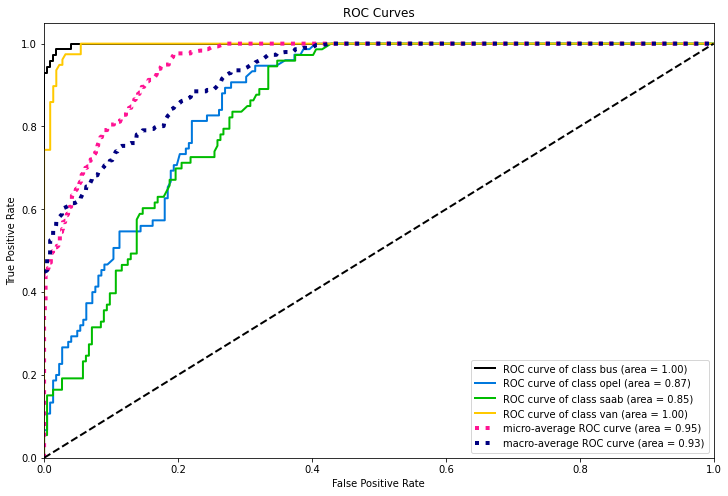

In [0]:
scikitplot.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test_modified), figsize=(12, 8))

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [0]:
dataset_modified = np.delete(dataset, [9, 12], axis=1)

dataset_permutated = np.random.permutation(dataset_modified)
data_permutated = dataset_permutated[:, :-1].astype(int)
target_permutated = dataset_permutated[:, -1]

In [0]:
#Building a Learning curve for Logisitic Regression

logistic_accuracy = []
logistic_f1 = []

logistic_pipe = make_pipeline(
    StandardScaler(), 
    LogisticRegression(
        penalty="l1",
        C=0.9,
        multi_class='multinomial', 
        solver='saga', tol=1e-3, 
        max_iter=500, 
        random_state=117)
)

for i in range(1, 10):
    X_train = data_permutated[:len(data_permutated) // 10 * i]
    y_train = target_permutated[:len(data_permutated) // 10 * i]
    X_test = data_permutated[len(data_permutated) // 10 * i :]
    y_test = target_permutated[len(data_permutated) // 10 * i :]
    logistic_pipe.fit(X_train, y_train)
    logistic_accuracy.append(accuracy(y_test, logistic_pipe.predict(X_test)))
    logistic_f1.append(f1(y_test, logistic_pipe.predict(X_test), average="weighted"))

In [0]:
dataset_permutated = np.random.permutation(dataset_permutated)
data_permutated = dataset_permutated[:, :-1].astype(int)
target_permutated = dataset_permutated[:, -1]

In [0]:
#Building a Learning curve for Desicion Tree

tree_accuracy = []
tree_f1 = []

tree_pipe = make_pipeline(
    StandardScaler(), 
    DecisionTreeClassifier(random_state=13, max_depth=7)
)

for i in range(1, 10):
    X_train = data_permutated[:len(data_permutated) // 10 * i]
    y_train = target_permutated[:len(data_permutated) // 10 * i]
    X_test = data_permutated[len(data_permutated) // 10 * i :]
    y_test = target_permutated[len(data_permutated) // 10 * i :]
    tree_pipe.fit(X_train, y_train)
    tree_accuracy.append(accuracy(y_test, tree_pipe.predict(X_test)))
    tree_f1.append(f1(y_test, tree_pipe.predict(X_test), average="weighted"))

In [0]:
dataset_permutated = np.random.permutation(dataset_permutated)
data_permutated = dataset_permutated[:, :-1].astype(int)
target_permutated = dataset_permutated[:, -1]

In [0]:
#Building a Learning curve for Random Forest

forest_accuracy = []
forest_f1 = []

forest_pipe = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(
        max_depth=12,
        n_estimators=62,
        bootstrap=True, 
        n_jobs=-1, 
        random_state=42)
)

for i in range(1, 10):
    X_train = data_permutated[:len(data_permutated) // 10 * i]
    y_train = target_permutated[:len(data_permutated) // 10 * i]
    X_test = data_permutated[len(data_permutated) // 10 * i :]
    y_test = target_permutated[len(data_permutated) // 10 * i :]
    forest_pipe.fit(X_train, y_train)
    forest_accuracy.append(accuracy(y_test, forest_pipe.predict(X_test)))
    forest_f1.append(f1(y_test, forest_pipe.predict(X_test), average="weighted"))

Text(0, 0.5, 'Percentage')

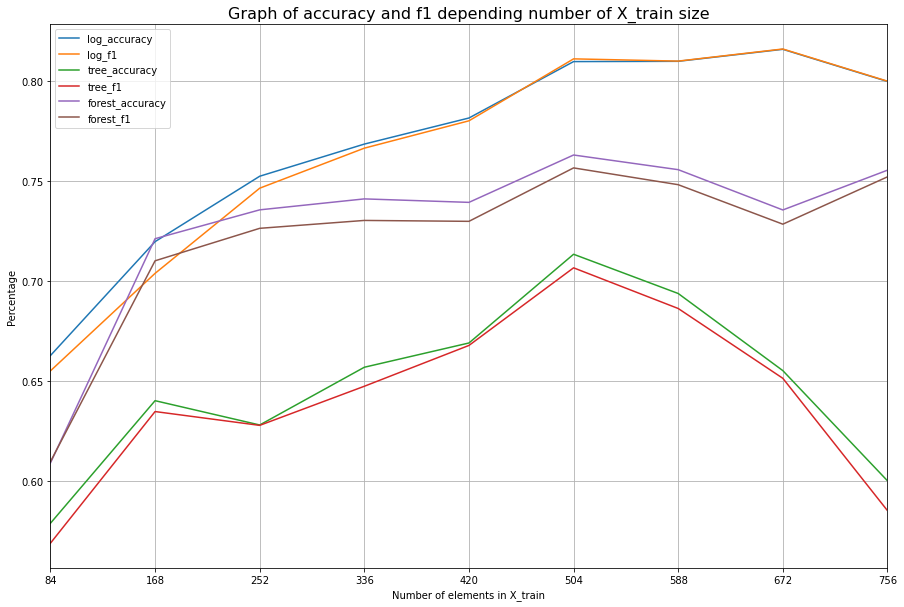

In [0]:
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(len(data) // 10 * np.arange(1, 10), logistic_accuracy, label="log_accuracy")
plt.plot(len(data) // 10 * np.arange(1, 10), logistic_f1, label="log_f1")
plt.plot(len(data) // 10 * np.arange(1, 10), tree_accuracy, label="tree_accuracy")
plt.plot(len(data) // 10 * np.arange(1, 10), tree_f1, label="tree_f1")
plt.plot(len(data) // 10 * np.arange(1, 10), forest_accuracy, label="forest_accuracy")
plt.plot(len(data) // 10 * np.arange(1, 10), forest_f1, label="forest_f1")
plt.xticks(len(data) // 10 * np.arange(1, 10))
plt.xlim(xmin=84)
plt.xlim(xmax=756)
plt.legend()
plt.title("Graph of accuracy and f1 depending number of X_train size", {'fontsize': 16})
plt.xlabel("Number of elements in X_train")
plt.ylabel("Percentage")

In [0]:
optimal_train_test_split = len(dataset) // 10 * ((np.argmax(logistic_accuracy) + np.argmax(logistic_f1) + 
                           np.argmax(tree_accuracy) + np.argmax(tree_f1) +
                           np.argmax(forest_accuracy) + np.argmax(forest_f1) + 6) / 6) # +6 bc indices start at 0, bt we need from 1

print("Optimal train size: ", round(optimal_train_test_split / len(dataset) * 100), "%", sep="")
print("Optimal test size: ", round(100 - optimal_train_test_split / len(dataset)* 100), "%", sep="")

Optimal train size: 66.0%
Optimal test size: 34.0%


We can now see, why the size of around $35\%$ is used in $\operatorname{train\_test\_split}$ method at the beginning of out work.